In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

recent1 : 2021.07 ~ 2022.06 <br>
recent2 : 2020.07 ~ 2021.06 <br>
recent3 : 2019.07 ~ 2020.06 <br>
recent4 : 2018.07 ~ 2019.06 <br>

In [141]:
recent1 =pd.read_csv('../data/202107~202207/20220715122427_방문자 수 추이.csv',encoding='euc-kr')
recent2 =pd.read_csv('../data/202007-202106_데이터랩_다운로드/20220715122653_방문자 수 추이.csv',encoding='euc-kr')
recent3 =pd.read_csv('../data/201907-202006_데이터랩_다운로드/20220715122738_방문자 수 추이.csv',encoding='euc-kr')
recent4 =pd.read_csv('../data/201807-201906_데이터랩_다운로드/20220715122747_방문자 수 추이.csv',encoding='euc-kr')


In [142]:
df_list = [recent1,recent2,recent3,recent4]

In [146]:
for df in df_list:
    df.drop('광역지자체',axis=1,inplace=True)
    df['기준년월']=df['기준년월'].apply(lambda x:  str(x)[2:4]+'-'+str(x)[-2:])

In [148]:
tmp = pd.concat([recent1,recent2,recent3,recent4],axis=0,ignore_index=True)

In [149]:
recent1['방문자 구분'].value_counts().index

Index(['현지인방문자(a)', '외지인방문자(b)', '외국인방문자(c)', '외부방문자(b+c)', '전체방문자(a+b+c)'], dtype='object')

In [150]:
recent1['기준년월'].value_counts().index

Index(['21-07', '21-08', '21-09', '21-10', '21-11', '21-12', '22-01', '22-02',
       '22-03', '22-04', '22-05', '22-06'],
      dtype='object')

In [151]:
recent1.pivot(
    index='기준년월',
    columns='방문자 구분',
    values='방문자 수'
)

방문자 구분,외국인방문자(c),외부방문자(b+c),외지인방문자(b),전체방문자(a+b+c),현지인방문자(a)
기준년월,,,,,
21-07,28192.0,5671634.0,5643442.0,22070044.0,16398410.0
21-08,24271.0,5237857.0,5213586.0,21061686.0,15823829.0
21-09,23725.0,4531532.0,4507808.0,20333763.0,15802230.0
21-10,32884.0,5801364.0,5768480.0,22694691.0,16893328.0
21-11,27695.0,5615658.0,5587964.0,21962877.0,16347219.0
21-12,26552.0,5303303.0,5276750.0,22036337.0,16733034.0
22-01,23124.0,6044829.0,6021704.0,22188390.0,16143561.0
22-02,22562.0,5076037.0,5053475.0,19652690.0,14576653.0
22-03,24492.0,4829488.0,4804996.0,21116122.0,16286634.0


In [152]:
tmp_pivot=tmp.pivot(
    index='기준년월',
    columns='방문자 구분',
    values='방문자 수'
)

In [175]:
y_min=tmp_pivot['외지인방문자(b)'].describe()['min']
y_max=tmp_pivot['외지인방문자(b)'].describe()['max']

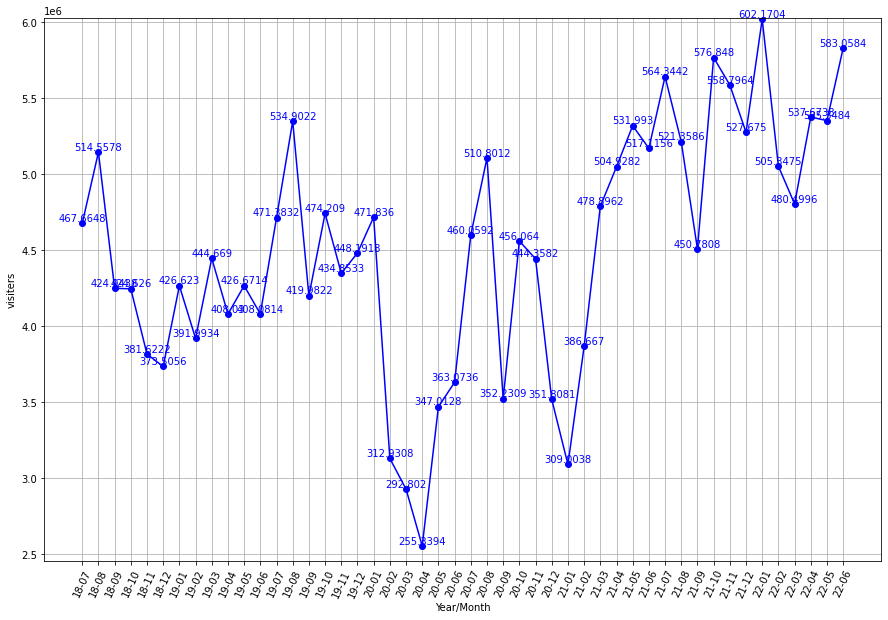

In [200]:
plt.figure(figsize=(15,10))
#plt.plot(tmp_pivot.index,'외국인방문자(c)',data=tmp_pivot)
plt.plot(tmp_pivot.index,'외지인방문자(b)','bo-',data=tmp_pivot)
plt.xlabel('Year/Month')
plt.ylabel('visiters')
plt.ylim([y_min-100000,y_max+10000])
plt.xticks(rotation=65)
for i, v in enumerate(tmp_pivot.index):
    plt.text(v, tmp_pivot['외지인방문자(b)'][i], (tmp_pivot['외지인방문자(b)'][i]/10000),                 
                                            # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.grid()
plt.show()

In [94]:
date_list=list((tmp_pivot.index))

In [203]:
tmp_pivot.to_csv('../data/visitors_data.csv',encoding='utf-8')

In [204]:
pd.read_csv('../data/visitors_data.csv',encoding='utf-8')

,기준년월,외국인방문자(c),외부방문자(b+c),외지인방문자(b),전체방문자(a+b+c),현지인방문자(a)
0,18-07,429641.0,5106289.0,4676648.0,19347463.0,14241174.0
1,18-08,466492.0,5612069.0,5145578.0,19682052.0,14069982.0
2,18-09,460155.0,4709593.0,4249438.0,18480017.0,13770424.0
3,18-10,506418.0,4752678.0,4246260.0,19185523.0,14432845.0
4,18-11,372379.0,4188600.0,3816222.0,18020233.0,13831632.0
5,18-12,379421.0,4114478.0,3735056.0,18282082.0,14167604.0
6,19-01,312594.0,4578825.0,4266230.0,18579532.0,14000707.0
7,19-02,355574.0,4275507.0,3919934.0,16709191.0,12433684.0
8,19-03,406773.0,4853464.0,4446690.0,19169647.0,14316183.0
9,19-04,495204.0,4575504.0,4080300.0,18120147.0,13544643.0
